## Mount the Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Topic_Modelling/transcripts/

/content/drive/MyDrive/Topic_Modelling/transcripts


In [3]:
!pip install -U contextualized_topic_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.5 MB/s 
     |████████████████████████████████| 24.1 MB 2.2 MB/s 
     |████████████████████████████████| 783 kB 61.4 MB/s 
     |████████████████████████████████| 121 kB 79.1 MB/s 
     |████████████████████████████████| 1.4 MB 72.0 MB/s 
     |████████████████████████████████| 1.6 MB 79.2 MB/s 
     |████████████████████████████████| 109 kB 73.4 MB/s 
     |████████████████████████████████| 4.7 MB 74.0 MB/s 
     |████████████████████████████████| 1.3 MB 71.3 MB/s 
     |████████████████████████████████| 120 kB 63.9 MB/s 
     |████████████████████████████████| 6.6 MB 62.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=fa634d7c9207556fbde6f5e8b0329636caf9a233785d52d8f42b558032e40de3
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc

In [4]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 14.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=1d14a9ab77bf66302a4b981c9d4628ea5b3e130a2c6bbc2b6584b860c72c5d82
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=ba24b988dbada857342ccabff2ec5ca3a5951edb40ad0bee0dffcaf84e246460
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyldavis sklearn


## Import the required libraries

In [6]:
from contextualized_topic_models.models.ctm import CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords
import nltk

## Loading the Intuit dataset

In [7]:
import pickle

with open("intuit/2020Q4/896878_intuit_2020Q4.pickle", "rb") as fp:   
  data = pickle.load(fp)

print(len(data))
print(data)

3
{'transcript': {'Kim Watkins': ['\nThanks, Latif. Good afternoon. And welcome to Intuit’s fourth quarter fiscal 2020 conference call. I am here with Intuit’s CEO, Sasan Goodarzi; and Michelle Clatterbuck, our CFO.\nBefore we start, I’d like to remind everyone that our remarks will include forward-looking statements. There are a number of factors that could cause Intuit’s results to differ materially from our expectations.\nYou can learn more about these risks in the press release we issued earlier this afternoon, our Form 10-K for fiscal 2019 and our other SEC filings.\nAll of those documents are available on the Investor Relations page of Intuit’s website at intuit.com. We assume no obligation to update any forward-looking statements.\nSome of the numbers in these remarks are presented on a non-GAAP basis.\nWe have reconciled the comparable GAAP and non-GAAP numbers in today’s press release. Unless otherwise noted, all growth rates refer to the current period versus the comparable p

In [8]:
print(data['transcript'].keys())
intuit_data = data['transcript']['Kim Watkins']+data['transcript']['Sasan Goodarzi']+data['transcript']['Michelle Clatterbuck']

dict_keys(['Kim Watkins', 'Sasan Goodarzi', 'Michelle Clatterbuck', 'Brad Zelnick', 'Ken Wong', 'Robert Simmons', 'Siti Panigrahi', 'Kirk Materne', 'Brent Thill', 'Mark Rende', 'Scott Schneeberger', 'Sterling Auty', 'Jennifer Lowe', 'Michael Millman', 'Michael Turrin', 'Josh Beck', 'Kartik Mehta', 'Brad Reback', 'Operator'])


## Data Preprocessing

In [9]:
count=0
string_list=[]
for i in intuit_data:
  count = count + len (i.strip().split("\n"))
  string_list+= i.strip().split("\n") 
data_final=[]
for i in string_list:
  if (len(i)>20):
    data_final.append(i)
print(data_final[0])

Thanks, Latif. Good afternoon. And welcome to Intuit’s fourth quarter fiscal 2020 conference call. I am here with Intuit’s CEO, Sasan Goodarzi; and Michelle Clatterbuck, our CFO.


In [10]:
print(data_final)

['Thanks, Latif. Good afternoon. And welcome to Intuit’s fourth quarter fiscal 2020 conference call. I am here with Intuit’s CEO, Sasan Goodarzi; and Michelle Clatterbuck, our CFO.', 'Before we start, I’d like to remind everyone that our remarks will include forward-looking statements. There are a number of factors that could cause Intuit’s results to differ materially from our expectations.', 'You can learn more about these risks in the press release we issued earlier this afternoon, our Form 10-K for fiscal 2019 and our other SEC filings.', 'All of those documents are available on the Investor Relations page of Intuit’s website at intuit.com. We assume no obligation to update any forward-looking statements.', 'Some of the numbers in these remarks are presented on a non-GAAP basis.', 'We have reconciled the comparable GAAP and non-GAAP numbers in today’s press release. Unless otherwise noted, all growth rates refer to the current period versus the comparable prior year period, and the

In [11]:
print(len(data_final))

194


In [12]:
from nltk.corpus import stopwords as stop_words

nltk.download('stopwords')

# documents = [line.strip() for line in open(text_file, encoding="unicode_escape").readlines()]

stopwords = list(stop_words.words("english"))

sp = WhiteSpacePreprocessingStopwords(data_final, stopwords_list=stopwords)
preprocessed_documents, unpreprocessed_corpus, vocab, retained_indices = sp.preprocess()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
preprocessed_documents[:2]

['thanks latif good afternoon welcome fourth quarter fiscal conference call ceo sasan goodarzi michelle clatterbuck cfo',
 'start like remind everyone remarks include forward looking statements number factors could cause results differ materially expectations']

## i) Using all-mpnet-base-v2 Transformer

In [14]:
tp = TopicModelDataPreparation("all-mpnet-base-v2")

training_dataset = tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/contextualized_topic_models/utils/data_preparation.py:57: UserWarning: the longest document in your collection has 252 words, the model instead truncates to 128 tokens.
  warnings.warn(f"the longest document in your collection has {max_local_length} words, the model instead "


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
tp.vocab[:10]

['ability',
 'able',
 'absolutely',
 'accelerant',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'accept']

## Training the Combined TM

In [16]:
ctm = CombinedTM(bow_size=len(tp.vocab), contextual_size=768, n_components=20, num_epochs=10)
ctm.fit(training_dataset) # run the model

Epoch: [10/10]	 Seen Samples: [1940/1940]	Train Loss: 192.14926462075144	Time: 0:00:00.262058: : 10it [00:02,  3.63it/s]
Sampling: [20/20]: : 20it [00:03,  5.37it/s]


In [17]:
ctm.get_topic_lists(5)

[['company', 'earlier', 'good', 'four', 'actually'],
 ['kind', 'economy', 'expect', 'flat', 'simple'],
 ['get', 'small', 'employees', 'ensure', 'deeper'],
 ['really', 'team', 'big', 'based', 'never'],
 ['reallocating', 'commerce', 'top', 'wished', 'continue'],
 ['account', 'helping', 'needs', 'impact', 'expenses'],
 ['data', 'touch', 'back', 'category', 'stats'],
 ['remarkable', 'quickbooks', 'grow', 'first', 'everyone'],
 ['fallen', 'shared', 'flat', 'step', 'online'],
 ['five', 'partners', 'notes', 'effective', 'instantly'],
 ['taxes', 'expect', 'range', 'good', 'represent'],
 ['partner', 'consider', 'turning', 'excluding', 'testing'],
 ['experts', 'terrific', 'conversion', 'heard', 'recommendation'],
 ['issue', 'user', 'tailwinds', 'provider', 'fun'],
 ['got', 'self', 'cause', 'use', 'filed'],
 ['still', 'revenue', 'one', 'increase', 'hold'],
 ['product', 'get', 'goal', 'customer', 'score'],
 ['share', 'diluted', 'million', 'significant', 'opportunity'],
 ['run', 'principles', 'capa

In [18]:
ctm.get_topics()

defaultdict(list,
            {0: ['company',
              'earlier',
              'good',
              'four',
              'actually',
              'globally',
              'nonrecurring',
              'well',
              'talked',
              'rolling'],
             1: ['kind',
              'economy',
              'expect',
              'flat',
              'simple',
              'yes',
              'source',
              'desktop',
              'recognize',
              'going'],
             2: ['get',
              'small',
              'employees',
              'ensure',
              'deeper',
              'fourth',
              'remarkable',
              'points',
              'live',
              'levels'],
             3: ['really',
              'team',
              'big',
              'based',
              'never',
              'account',
              'tests',
              'uncertain',
              'qbo',
              'nearly'],
        

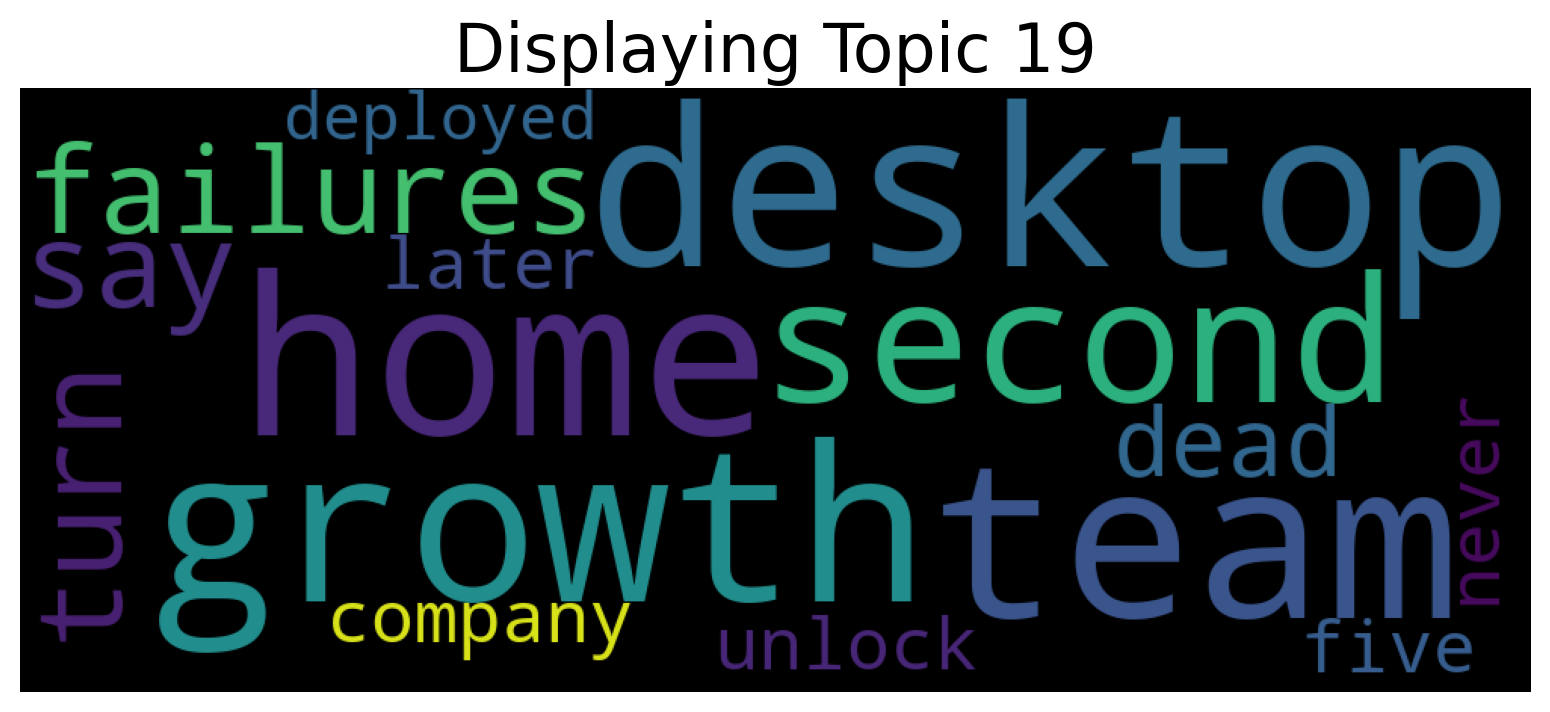

In [19]:
ctm.get_wordcloud(topic_id=19, n_words=15)

## Visualization using pyLDAvis

In [20]:
lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=10)

Sampling: [10/10]: : 10it [00:01,  5.20it/s]


In [21]:
import pyLDAvis as vis

lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=10)

ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
Sampling: [10/10]: : 10it [00:01,  5.29it/s]
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


## Topic Predictions

In [22]:
topics_predictions = ctm.get_thetas(training_dataset, n_samples=5) # get all the topic predictions

Sampling: [5/5]: : 5it [00:00,  5.33it/s]


In [23]:
preprocessed_documents[0] # see the text of our preprocessed document

'thanks latif good afternoon welcome fourth quarter fiscal conference call ceo sasan goodarzi michelle clatterbuck cfo'

In [24]:
import numpy as np
topic_number = np.argmax(topics_predictions[0]) # get the topic id of the first document

In [25]:
topic_number

1

In [26]:
ctm.get_topic_lists()

[['company',
  'earlier',
  'good',
  'four',
  'actually',
  'globally',
  'nonrecurring',
  'well',
  'talked',
  'rolling'],
 ['kind',
  'economy',
  'expect',
  'flat',
  'simple',
  'yes',
  'source',
  'desktop',
  'recognize',
  'going'],
 ['get',
  'small',
  'employees',
  'ensure',
  'deeper',
  'fourth',
  'remarkable',
  'points',
  'live',
  'levels'],
 ['really',
  'team',
  'big',
  'based',
  'never',
  'account',
  'tests',
  'uncertain',
  'qbo',
  'nearly'],
 ['reallocating',
  'commerce',
  'top',
  'wished',
  'continue',
  'method',
  'consideration',
  'build',
  'really',
  'believe'],
 ['account',
  'helping',
  'needs',
  'impact',
  'expenses',
  'attractive',
  'qbo',
  'seeing',
  'fully',
  'cost'],
 ['data',
  'touch',
  'back',
  'category',
  'stats',
  'refer',
  'bet',
  'comparable',
  'first',
  'diy'],
 ['remarkable',
  'quickbooks',
  'grow',
  'first',
  'everyone',
  'dead',
  'ecosystem',
  'around',
  'willing',
  'within'],
 ['fallen',
  'sha

In [27]:
ctm.get_topic_lists(5)[5]

['account', 'helping', 'needs', 'impact', 'expenses']

In [28]:
ctm.get_topic_lists(5)[topic_number] 

['kind', 'economy', 'expect', 'flat', 'simple']

## ii) Using Finbert Transformer

In [29]:
tp1 = TopicModelDataPreparation("ProsusAI/finbert") # instantiate a contextualized model

# create the training set
training_dataset = tp1.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/758 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/252 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/ProsusAI_finbert were not used when initializing BertModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/contextualized_topic_models/utils/data_preparation.py:57: UserWarning: the longest document in your collection has 252 words, the model instead truncates to 128 tokens.
  warnings.warn(f"the longest document in your collection has {max_local_length} words, the model instead "


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
tp1.vocab[:10]

['ability',
 'able',
 'absolutely',
 'accelerant',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'accept']

In [31]:
tp1.vocab[:]

['ability',
 'able',
 'absolutely',
 'accelerant',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'accept',
 'access',
 'accident',
 'accomplished',
 'accomplishments',
 'account',
 'accountants',
 'accounting',
 'accounts',
 'accurate',
 'achieve',
 'achieving',
 'acquisition',
 'acquisitions',
 'across',
 'acting',
 'active',
 'actually',
 'add',
 'added',
 'addition',
 'address',
 'adjust',
 'adoption',
 'advanced',
 'advantages',
 'afternoon',
 'agnostic',
 'ago',
 'ahead',
 'ai',
 'albeit',
 'aligned',
 'allowing',
 'allows',
 'almost',
 'along',
 'also',
 'alternative',
 'although',
 'always',
 'amazon',
 'ambitious',
 'analysis',
 'announced',
 'another',
 'answer',
 'apparent',
 'applications',
 'applies',
 'approach',
 'approved',
 'approximately',
 'apps',
 'april',
 'area',
 'areas',
 'arizona',
 'around',
 'arpc',
 'aside',
 'asked',
 'assisted',
 'associated',
 'assume',
 'assumes',
 'attached',
 'attractive',
 'attrition',
 'authorizatio

#### Training Combined TM

In [32]:
ctm = CombinedTM(bow_size=len(tp1.vocab), contextual_size=768, n_components=10, num_epochs=10)
ctm.fit(training_dataset) # run the model

Epoch: [10/10]	 Seen Samples: [1940/1940]	Train Loss: 180.24538869956106	Time: 0:00:00.427506: : 10it [00:03,  3.25it/s]
Sampling: [20/20]: : 20it [00:04,  4.12it/s]


#### Getting the Topics

In [33]:
ctm.get_topic_lists()

[['upcoming',
  'worker',
  'friction',
  'fast',
  'experienced',
  'struggling',
  'monitor',
  'automatically',
  'sasan',
  'nice'],
 ['experience',
  'focus',
  'continue',
  'quickbooks',
  'confidence',
  'effective',
  'experts',
  'customer',
  'mix',
  'share'],
 ['back',
  'cloud',
  'accelerate',
  'apparent',
  'principles',
  'good',
  'wrap',
  'looking',
  'revolutionize',
  'run'],
 ['mean',
  'organized',
  'welcome',
  'power',
  'held',
  'moment',
  'comparison',
  'penalties',
  'ever',
  'lacked'],
 ['recently',
  'com',
  'game',
  'helping',
  'finding',
  'turbo',
  'assumes',
  'accelerate',
  'establish',
  'done'],
 ['revenue',
  'approximately',
  'last',
  'year',
  'loss',
  'filing',
  'platform',
  'us',
  'paycheck',
  'enterprise'],
 ['manage',
  'platform',
  'group',
  'second',
  'payroll',
  'shift',
  'levels',
  'expert',
  'businesses',
  'single'],
 ['improve',
  'time',
  'heard',
  'strongest',
  'service',
  'make',
  'consideration',
  't

In [34]:
ctm.get_topics()

defaultdict(list,
            {0: ['upcoming',
              'worker',
              'friction',
              'fast',
              'experienced',
              'struggling',
              'monitor',
              'automatically',
              'sasan',
              'nice'],
             1: ['experience',
              'focus',
              'continue',
              'quickbooks',
              'confidence',
              'effective',
              'experts',
              'customer',
              'mix',
              'share'],
             2: ['back',
              'cloud',
              'accelerate',
              'apparent',
              'principles',
              'good',
              'wrap',
              'looking',
              'revolutionize',
              'run'],
             3: ['mean',
              'organized',
              'welcome',
              'power',
              'held',
              'moment',
              'comparison',
              'penalties',
          

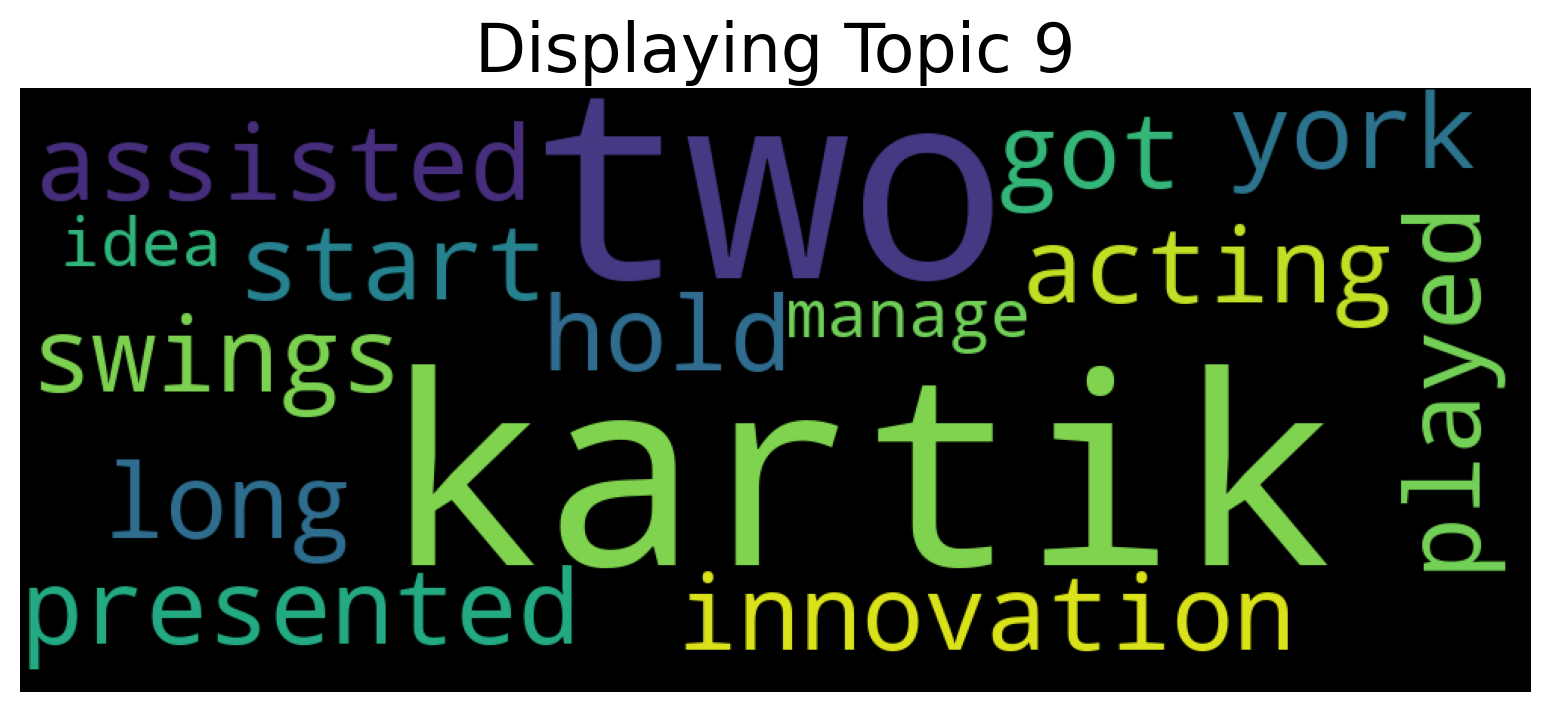

In [35]:
ctm.get_wordcloud(topic_id=9, n_words=15)

#### pyLDAvis for Visualization

In [36]:
lda_vis_data = ctm.get_ldavis_data_format(tp1.vocab, training_dataset, n_samples=10)

Sampling: [10/10]: : 10it [00:01,  5.07it/s]


In [37]:
import pyLDAvis as vis
lda_vis_data = ctm.get_ldavis_data_format(tp1.vocab, training_dataset, n_samples=10)
ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

Sampling: [10/10]: : 10it [00:01,  5.22it/s]
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


#### Topic Predictions

In [38]:
topics_predictions = ctm.get_thetas(training_dataset, n_samples=5) 

Sampling: [5/5]: : 5it [00:00,  5.18it/s]


In [39]:
preprocessed_documents[0] 

'thanks latif good afternoon welcome fourth quarter fiscal conference call ceo sasan goodarzi michelle clatterbuck cfo'

In [40]:
import numpy as np
topic_number = np.argmax(topics_predictions[0]) 

In [41]:
topic_number

3

In [42]:
ctm.get_topic_lists()

[['upcoming',
  'worker',
  'friction',
  'fast',
  'experienced',
  'struggling',
  'monitor',
  'automatically',
  'sasan',
  'nice'],
 ['experience',
  'focus',
  'continue',
  'quickbooks',
  'confidence',
  'effective',
  'experts',
  'customer',
  'mix',
  'share'],
 ['back',
  'cloud',
  'accelerate',
  'apparent',
  'principles',
  'good',
  'wrap',
  'looking',
  'revolutionize',
  'run'],
 ['mean',
  'organized',
  'welcome',
  'power',
  'held',
  'moment',
  'comparison',
  'penalties',
  'ever',
  'lacked'],
 ['recently',
  'com',
  'game',
  'helping',
  'finding',
  'turbo',
  'assumes',
  'accelerate',
  'establish',
  'done'],
 ['revenue',
  'approximately',
  'last',
  'year',
  'loss',
  'filing',
  'platform',
  'us',
  'paycheck',
  'enterprise'],
 ['manage',
  'platform',
  'group',
  'second',
  'payroll',
  'shift',
  'levels',
  'expert',
  'businesses',
  'single'],
 ['improve',
  'time',
  'heard',
  'strongest',
  'service',
  'make',
  'consideration',
  't

In [43]:
ctm.get_topic_lists(5)[5]

['revenue', 'approximately', 'last', 'year', 'loss']

In [44]:
ctm.get_topic_lists(5)[topic_number] 

['mean', 'organized', 'welcome', 'power', 'held']

## iii) Using all-distilroberta-v1 Transformer

In [45]:
tp2 = TopicModelDataPreparation("all-distilroberta-v1") # instantiate a contextualized model

# create the training set
training_dataset = tp2.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/653 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/contextualized_topic_models/utils/data_preparation.py:57: UserWarning: the longest document in your collection has 252 words, the model instead truncates to 128 tokens.
  warnings.warn(f"the longest document in your collection has {max_local_length} words, the model instead "


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
tp2.vocab[:10]

['ability',
 'able',
 'absolutely',
 'accelerant',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'accept']

In [47]:
tp2.vocab[:]

['ability',
 'able',
 'absolutely',
 'accelerant',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'accept',
 'access',
 'accident',
 'accomplished',
 'accomplishments',
 'account',
 'accountants',
 'accounting',
 'accounts',
 'accurate',
 'achieve',
 'achieving',
 'acquisition',
 'acquisitions',
 'across',
 'acting',
 'active',
 'actually',
 'add',
 'added',
 'addition',
 'address',
 'adjust',
 'adoption',
 'advanced',
 'advantages',
 'afternoon',
 'agnostic',
 'ago',
 'ahead',
 'ai',
 'albeit',
 'aligned',
 'allowing',
 'allows',
 'almost',
 'along',
 'also',
 'alternative',
 'although',
 'always',
 'amazon',
 'ambitious',
 'analysis',
 'announced',
 'another',
 'answer',
 'apparent',
 'applications',
 'applies',
 'approach',
 'approved',
 'approximately',
 'apps',
 'april',
 'area',
 'areas',
 'arizona',
 'around',
 'arpc',
 'aside',
 'asked',
 'assisted',
 'associated',
 'assume',
 'assumes',
 'attached',
 'attractive',
 'attrition',
 'authorizatio

In [48]:
ctm = CombinedTM(bow_size=len(tp2.vocab), contextual_size=768, n_components=20, num_epochs=10)
ctm.fit(training_dataset) # run the model

Epoch: [10/10]	 Seen Samples: [1940/1940]	Train Loss: 190.12283104965368	Time: 0:00:00.264138: : 10it [00:02,  3.63it/s]
Sampling: [20/20]: : 20it [00:06,  3.11it/s]


In [49]:
# Getting the topics
ctm.get_topic_lists(5)

[['another', 'margin', 'scores', 'seeing', 'engaged'],
 ['customers', 'access', 'help', 'business', 'employed'],
 ['quickbooks', 'continue', 'close', 'virtual', 'like'],
 ['money', 'welcome', 'longer', 'smb', 'refund'],
 ['product', 'nature', 'sometimes', 'perspective', 'loans'],
 ['sasan', 'achieving', 'matter', 'performance', 'things'],
 ['end', 'build', 'offering', 'particularly', 'fiscal'],
 ['accelerant', 'calendar', 'ones', 'accelerated', 'picking'],
 ['history', 'analysis', 'significant', 'quarter', 'always'],
 ['deployed', 'lot', 'question', 'yeah', 'pursue'],
 ['even', 'reminder', 'credit', 'expect', 'billion'],
 ['taxes', 'truly', 'looking', 'confidence', 'want'],
 ['refund', 'third', 'contribution', 'bank', 'filings'],
 ['absolutely', 'come', 'say', 'capabilities', 'potentially'],
 ['tam', 'conversion', 'cloud', 'margins', 'experts'],
 ['would', 'tell', 'time', 'look', 'access'],
 ['help', 'really', 'flat', 'roughly', 'operated'],
 ['share', 'including', 'percentage', 'needs

In [50]:
ctm.get_topics()

defaultdict(list,
            {0: ['another',
              'margin',
              'scores',
              'seeing',
              'engaged',
              'matter',
              'able',
              'metrics',
              'every',
              'moving'],
             1: ['customers',
              'access',
              'help',
              'business',
              'employed',
              'small',
              'ai',
              'perspective',
              'accounting',
              'loans'],
             2: ['quickbooks',
              'continue',
              'close',
              'virtual',
              'like',
              'seeing',
              'bets',
              'live',
              'work',
              'lead'],
             3: ['money',
              'welcome',
              'longer',
              'smb',
              'refund',
              'robust',
              'resources',
              'press',
              'profitably',
              'got'],
  

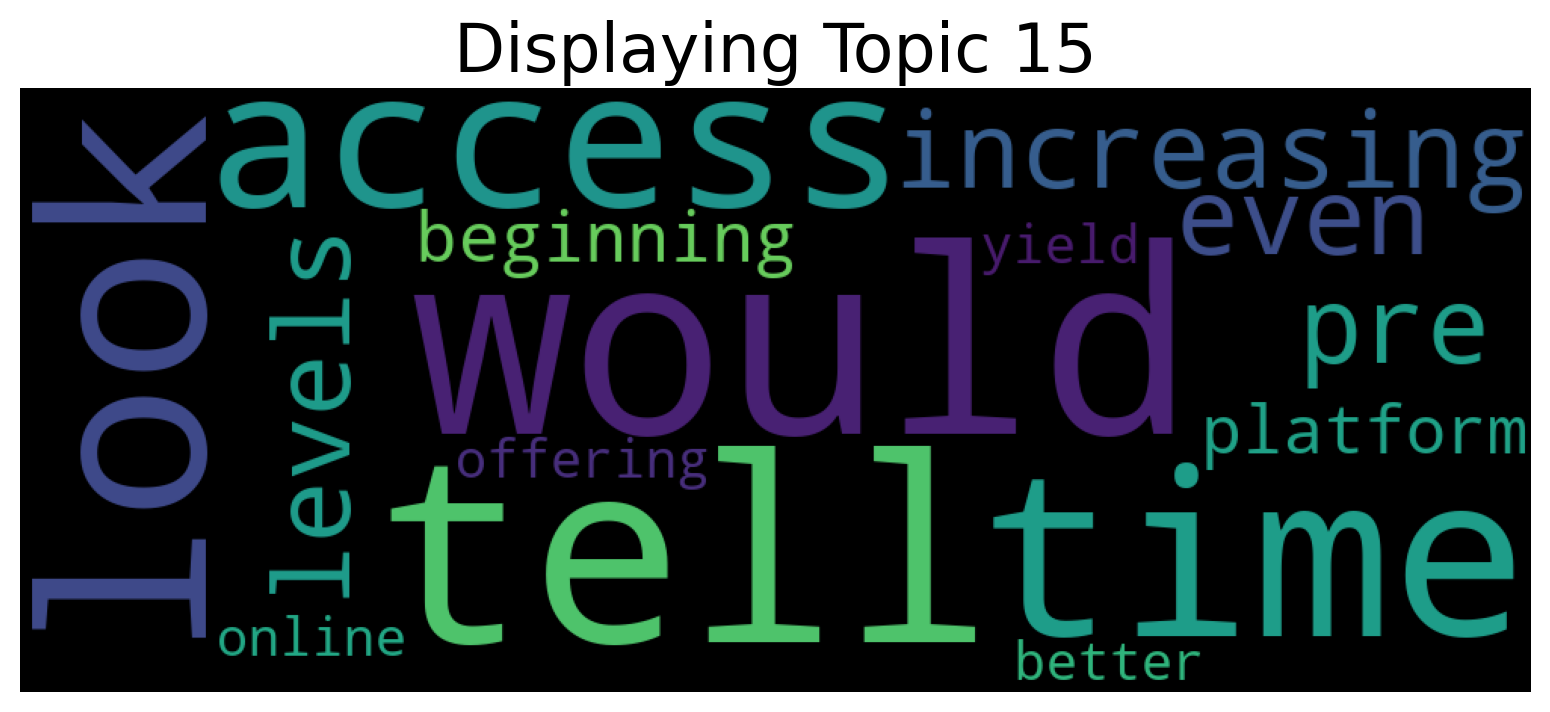

In [51]:
ctm.get_wordcloud(topic_id=15, n_words=15)

In [52]:
# PyLDAvis Visualization
lda_vis_data = ctm.get_ldavis_data_format(tp2.vocab, training_dataset, n_samples=10)

Sampling: [10/10]: : 10it [00:02,  4.66it/s]


In [53]:
import pyLDAvis as vis
lda_vis_data = ctm.get_ldavis_data_format(tp2.vocab, training_dataset, n_samples=10)
ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

Sampling: [10/10]: : 10it [00:01,  5.08it/s]
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [54]:
# Topic predictions
topics_predictions = ctm.get_thetas(training_dataset, n_samples=5)

Sampling: [5/5]: : 5it [00:01,  4.89it/s]


In [55]:
preprocessed_documents[0]

'thanks latif good afternoon welcome fourth quarter fiscal conference call ceo sasan goodarzi michelle clatterbuck cfo'

In [56]:
import numpy as np
topic_number = np.argmax(topics_predictions[0])

In [57]:
topic_number

6

In [58]:
ctm.get_topic_lists()

[['another',
  'margin',
  'scores',
  'seeing',
  'engaged',
  'matter',
  'able',
  'metrics',
  'every',
  'moving'],
 ['customers',
  'access',
  'help',
  'business',
  'employed',
  'small',
  'ai',
  'perspective',
  'accounting',
  'loans'],
 ['quickbooks',
  'continue',
  'close',
  'virtual',
  'like',
  'seeing',
  'bets',
  'live',
  'work',
  'lead'],
 ['money',
  'welcome',
  'longer',
  'smb',
  'refund',
  'robust',
  'resources',
  'press',
  'profitably',
  'got'],
 ['product',
  'nature',
  'sometimes',
  'perspective',
  'loans',
  'conference',
  'followed',
  'trends',
  'economy',
  'voice'],
 ['sasan',
  'achieving',
  'matter',
  'performance',
  'things',
  'registered',
  'contractors',
  'insights',
  'two',
  'documents'],
 ['end',
  'build',
  'offering',
  'particularly',
  'fiscal',
  'throughout',
  'sort',
  'category',
  'professional',
  'even'],
 ['accelerant',
  'calendar',
  'ones',
  'accelerated',
  'picking',
  'economic',
  'scott',
  'planner

In [59]:
ctm.get_topic_lists(5)[5]

['sasan', 'achieving', 'matter', 'performance', 'things']

In [60]:
ctm.get_topic_lists(5)[topic_number]

['end', 'build', 'offering', 'particularly', 'fiscal']

## iv) Using roberta-base Transformer

In [61]:
tp3 = TopicModelDataPreparation("roberta-base") # instantiate a contextualized model

# create the training set
training_dataset = tp3.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/603k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/contextualized_topic_models/utils/data_preparation.py:57: UserWarning: the longest document in your collection has 252 words, the model instead truncates to 128 tokens.
  warnings.warn(f"the longest document in your c

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [62]:
tp3.vocab[:10]

['ability',
 'able',
 'absolutely',
 'accelerant',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'accept']

In [63]:
ctm = CombinedTM(bow_size=len(tp3.vocab), contextual_size=768, n_components=5, num_epochs=10)
ctm.fit(training_dataset) # run the model

Epoch: [10/10]	 Seen Samples: [1940/1940]	Train Loss: 177.54227400317635	Time: 0:00:00.282931: : 10it [00:02,  3.45it/s]
Sampling: [20/20]: : 20it [00:03,  5.04it/s]


In [64]:
ctm.get_topic_lists(5)

[['platform', 'inventory', 'levels', 'get', 'making'],
 ['questions', 'individually', 'gofundme', 'transactions', 'successfully'],
 ['whether', 'benefit', 'particular', 'proud', 'versus'],
 ['environment', 'value', 'us', 'opportunity', 'increased'],
 ['st', 'mid', 'choose', 'order', 'authorization']]

In [65]:
ctm.get_topics()

defaultdict(list,
            {0: ['platform',
              'inventory',
              'levels',
              'get',
              'making',
              'understand',
              'increased',
              'able',
              'time',
              'way'],
             1: ['questions',
              'individually',
              'gofundme',
              'transactions',
              'successfully',
              'intent',
              'drive',
              'systems',
              'hard',
              'nail'],
             2: ['whether',
              'benefit',
              'particular',
              'proud',
              'versus',
              'confidence',
              'etsy',
              'primarily',
              'control',
              'inspirational'],
             3: ['environment',
              'value',
              'us',
              'opportunity',
              'increased',
              'acquisition',
              'kind',
              'equation',
   

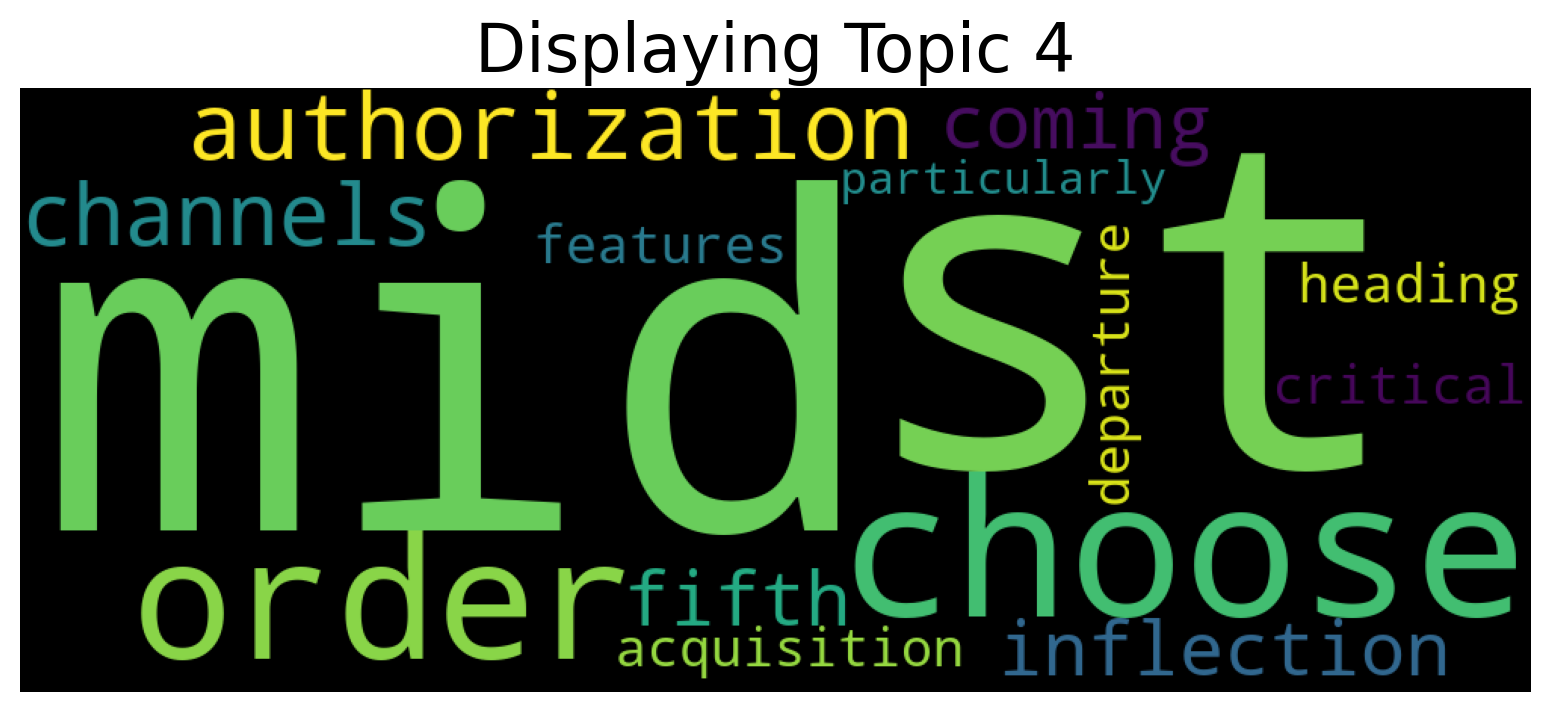

In [66]:
ctm.get_wordcloud(topic_id=4, n_words=15)

In [67]:
# PyLDAvis Visualization
lda_vis_data = ctm.get_ldavis_data_format(tp3.vocab, training_dataset, n_samples=10)

Sampling: [10/10]: : 10it [00:02,  4.94it/s]


In [68]:
import pyLDAvis as vis
lda_vis_data = ctm.get_ldavis_data_format(tp3.vocab, training_dataset, n_samples=10)
ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

Sampling: [10/10]: : 10it [00:01,  5.00it/s]
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [69]:
# Topic predictions
topics_predictions = ctm.get_thetas(training_dataset, n_samples=5) # get all the topic predictions

Sampling: [5/5]: : 5it [00:01,  4.96it/s]


In [70]:
preprocessed_documents[0]

'thanks latif good afternoon welcome fourth quarter fiscal conference call ceo sasan goodarzi michelle clatterbuck cfo'

In [71]:
import numpy as np
topic_number = np.argmax(topics_predictions[0]) 

In [72]:
topic_number

1

In [73]:
ctm.get_topic_lists(5)

[['platform', 'inventory', 'levels', 'get', 'making'],
 ['questions', 'individually', 'gofundme', 'transactions', 'successfully'],
 ['whether', 'benefit', 'particular', 'proud', 'versus'],
 ['environment', 'value', 'us', 'opportunity', 'increased'],
 ['st', 'mid', 'choose', 'order', 'authorization']]

In [74]:
ctm.get_topic_lists(5)[4]

['st', 'mid', 'choose', 'order', 'authorization']

In [75]:
ctm.get_topic_lists(5)[topic_number]

['questions', 'individually', 'gofundme', 'transactions', 'successfully']

## v) Using all-MiniLM-L6-v2 Transformer

In [76]:
tp4 = TopicModelDataPreparation("all-MiniLM-L6-v2") # instantiate a contextualized model

# create the training set
training_dataset = tp4.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/contextualized_topic_models/utils/data_preparation.py:57: UserWarning: the longest document in your collection has 252 words, the model instead truncates to 128 tokens.
  warnings.warn(f"the longest document in your collection has {max_local_length} words, the model instead "


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [77]:
tp4.vocab[:10]

['ability',
 'able',
 'absolutely',
 'accelerant',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'accept']

In [78]:
tp4.vocab[:]

['ability',
 'able',
 'absolutely',
 'accelerant',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration',
 'accept',
 'access',
 'accident',
 'accomplished',
 'accomplishments',
 'account',
 'accountants',
 'accounting',
 'accounts',
 'accurate',
 'achieve',
 'achieving',
 'acquisition',
 'acquisitions',
 'across',
 'acting',
 'active',
 'actually',
 'add',
 'added',
 'addition',
 'address',
 'adjust',
 'adoption',
 'advanced',
 'advantages',
 'afternoon',
 'agnostic',
 'ago',
 'ahead',
 'ai',
 'albeit',
 'aligned',
 'allowing',
 'allows',
 'almost',
 'along',
 'also',
 'alternative',
 'although',
 'always',
 'amazon',
 'ambitious',
 'analysis',
 'announced',
 'another',
 'answer',
 'apparent',
 'applications',
 'applies',
 'approach',
 'approved',
 'approximately',
 'apps',
 'april',
 'area',
 'areas',
 'arizona',
 'around',
 'arpc',
 'aside',
 'asked',
 'assisted',
 'associated',
 'assume',
 'assumes',
 'attached',
 'attractive',
 'attrition',
 'authorizatio

In [79]:
ctm = CombinedTM(bow_size=len(tp4.vocab), contextual_size=384, n_components=10, num_epochs=10)
ctm.fit(training_dataset) # run the model

Epoch: [10/10]	 Seen Samples: [1940/1940]	Train Loss: 181.9727663649726	Time: 0:00:00.251635: : 10it [00:02,  3.79it/s]
Sampling: [20/20]: : 20it [00:04,  4.99it/s]


In [80]:
ctm.get_topic_lists(5)

[['make', 'gaap', 'bit', 'grew', 'point'],
 ['confidence', 'set', 'become', 'account', 'business'],
 ['active', 'accounts', 'partners', 'digit', 'welcome'],
 ['turbotax', 'service', 'would', 'payroll', 'confidence'],
 ['rapid', 'seeing', 'financial', 'positioned', 'loss'],
 ['customers', 'customer', 'new', 'continue', 'bets'],
 ['rates', 'think', 'confidence', 'different', 'offerings'],
 ['kartik', 'military', 'ultimately', 'solutions', 'fact'],
 ['channels', 'actually', 'sense', 'facebook', 'importantly'],
 ['fiscal', 'really', 'essence', 'latif', 'choices']]

In [81]:
ctm.get_topics()

defaultdict(list,
            {0: ['make',
              'gaap',
              'bit',
              'grew',
              'point',
              'things',
              'fortunate',
              'remarks',
              'remind',
              'save'],
             1: ['confidence',
              'set',
              'become',
              'account',
              'business',
              'experts',
              'company',
              'growing',
              'apps',
              'customers'],
             2: ['active',
              'accounts',
              'partners',
              'digit',
              'welcome',
              'name',
              'remember',
              'category',
              'tripled',
              'technology'],
             3: ['turbotax',
              'service',
              'would',
              'payroll',
              'confidence',
              'shipments',
              'terms',
              'learned',
              'connected',
       

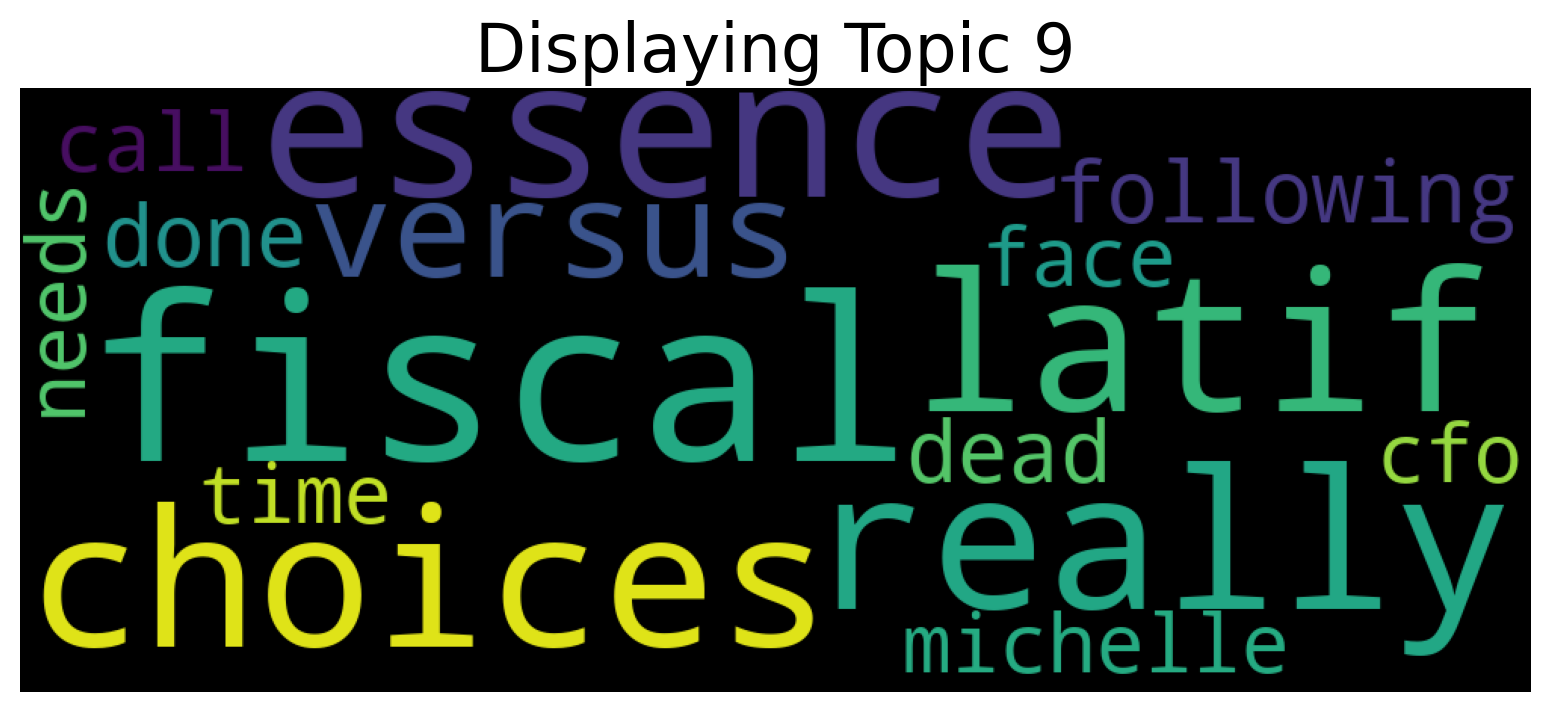

In [82]:
ctm.get_wordcloud(topic_id=9, n_words=15)

In [83]:
# PyLDAvis Visualization
lda_vis_data = ctm.get_ldavis_data_format(tp4.vocab, training_dataset, n_samples=10)

Sampling: [10/10]: : 10it [00:02,  4.93it/s]


In [84]:
import pyLDAvis as vis
lda_vis_data = ctm.get_ldavis_data_format(tp4.vocab, training_dataset, n_samples=10)
ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

Sampling: [10/10]: : 10it [00:02,  4.98it/s]
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [85]:
# Topic predictions
topics_predictions = ctm.get_thetas(training_dataset, n_samples=5) # get all the topic predictions

Sampling: [5/5]: : 5it [00:00,  5.02it/s]


In [86]:
preprocessed_documents[1]

'start like remind everyone remarks include forward looking statements number factors could cause results differ materially expectations'

In [87]:
import numpy as np
topic_number = np.argmax(topics_predictions[1]) 

In [88]:
topic_number

0

In [89]:
ctm.get_topic_lists(5)[5]

['customers', 'customer', 'new', 'continue', 'bets']

In [90]:
ctm.get_topic_lists(5)[topic_number]

['make', 'gaap', 'bit', 'grew', 'point']

## vi) Using all-MiniLM-L12-v2 Transformer

In [91]:
tp5 = TopicModelDataPreparation("all-MiniLM-L12-v2") 
training_dataset = tp5.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/contextualized_topic_models/utils/data_preparation.py:57: UserWarning: the longest document in your collection has 252 words, the model instead truncates to 128 tokens.
  warnings.warn(f"the longest document in your collection has {max_local_length} words, the model instead "


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [92]:
tp5.vocab[:1]

['ability']

In [93]:
tp5.vocab[:9]

['ability',
 'able',
 'absolutely',
 'accelerant',
 'accelerate',
 'accelerated',
 'accelerates',
 'accelerating',
 'acceleration']

In [94]:
ctm = CombinedTM(bow_size=len(tp5.vocab), contextual_size=384, n_components=10, num_epochs=10)
ctm.fit(training_dataset)

Epoch: [10/10]	 Seen Samples: [1940/1940]	Train Loss: 183.0156586637202	Time: 0:00:00.274362: : 10it [00:02,  3.83it/s]
Sampling: [20/20]: : 20it [00:03,  5.01it/s]


In [95]:
ctm.get_topic_lists(5)

[['hire', 'industries', 'hear', 'holding', 'chat'],
 ['reminder', 'point', 'calendar', 'small', 'include'],
 ['back', 'lot', 'customers', 'experience', 'copy'],
 ['important', 'well', 'filings', 'grew', 'release'],
 ['one', 'consumer', 'get', 'expectations', 'maybe'],
 ['inflection', 'unemployment', 'turbotax', 'financials', 'intuit'],
 ['specific', 'growth', 'income', 'small', 'set'],
 ['saw', 'globe', 'let', 'leverage', 'covid'],
 ['impact', 'businesses', 'call', 'providers', 'grew'],
 ['working', 'hope', 'worker', 'launched', 'fast']]

In [96]:
ctm.get_topics()

defaultdict(list,
            {0: ['hire',
              'industries',
              'hear',
              'holding',
              'chat',
              'helping',
              'starts',
              'bigger',
              'guidance',
              'shipments'],
             1: ['reminder',
              'point',
              'calendar',
              'small',
              'include',
              'unlikely',
              'learnings',
              'karma',
              'deferred',
              'making'],
             2: ['back',
              'lot',
              'customers',
              'experience',
              'copy',
              'noted',
              'need',
              'sense',
              'environment',
              'expect'],
             3: ['important',
              'well',
              'filings',
              'grew',
              'release',
              'failures',
              'would',
              'lot',
              'level',
              'fis

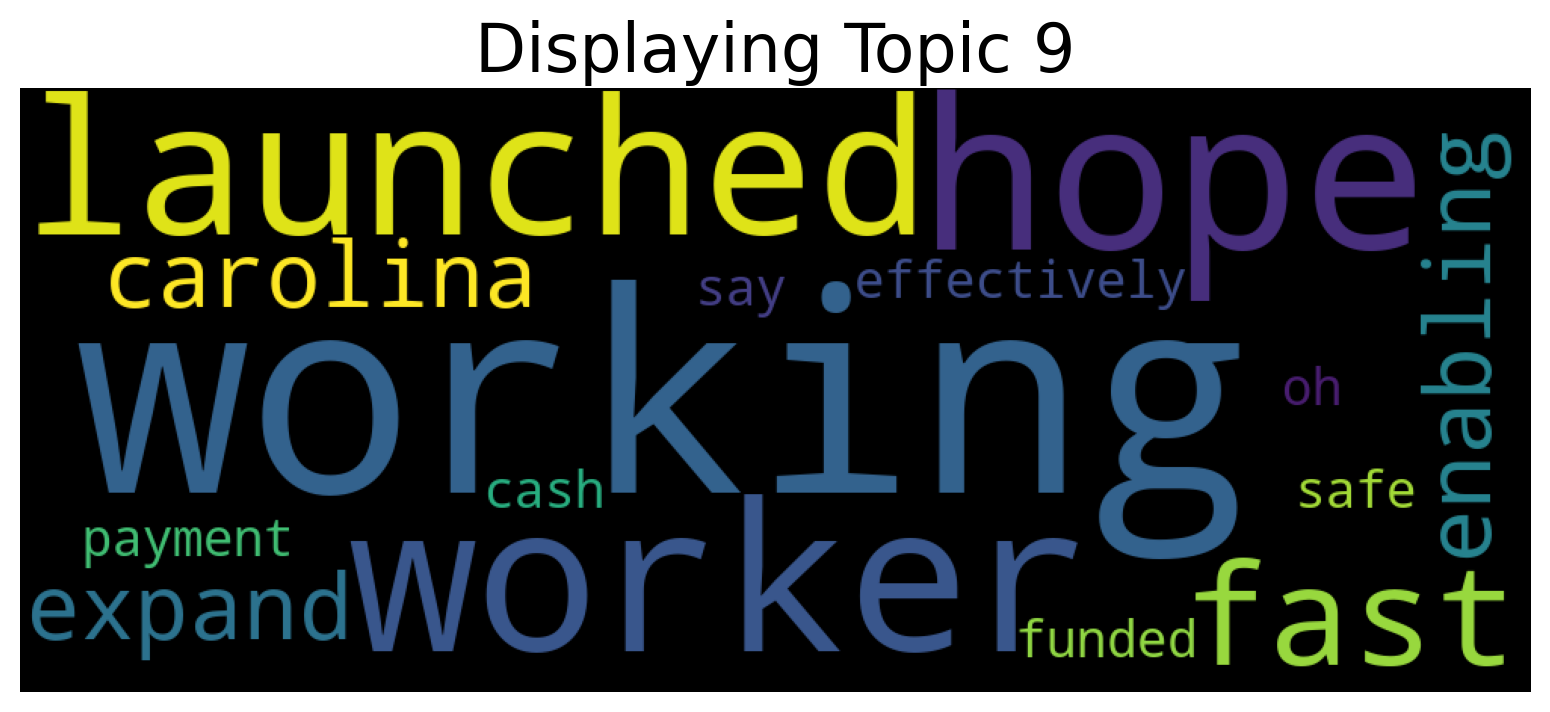

In [97]:
ctm.get_wordcloud(topic_id=9, n_words=15)

In [98]:
# PyLDAvis Visualization
lda_vis_data = ctm.get_ldavis_data_format(tp5.vocab, training_dataset, n_samples=10)

Sampling: [10/10]: : 10it [00:01,  5.03it/s]


In [99]:
import pyLDAvis as vis
lda_vis_data = ctm.get_ldavis_data_format(tp5.vocab, training_dataset, n_samples=10)
ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

Sampling: [10/10]: : 10it [00:01,  5.15it/s]
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [100]:
topics_predictions = ctm.get_thetas(training_dataset, n_samples=5)

Sampling: [5/5]: : 5it [00:01,  5.00it/s]


In [101]:
preprocessed_documents[0] 

'thanks latif good afternoon welcome fourth quarter fiscal conference call ceo sasan goodarzi michelle clatterbuck cfo'

In [102]:
import numpy as np
topic_number = np.argmax(topics_predictions[0])

In [103]:
topic_number

9

In [104]:
ctm.get_topic_lists(5)[5]

['inflection', 'unemployment', 'turbotax', 'financials', 'intuit']

In [105]:
ctm.get_topic_lists(5)[topic_number]

['working', 'hope', 'worker', 'launched', 'fast']